<a href="https://colab.research.google.com/github/zayo1511/ProyectoLabAnaDatFinDisInd/blob/main/Proyecto_Final_Laboratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Javier Alejando Fajardo Lopez

Arantza Gomez-Haro Gamboa

Diego Lozoya Morales

## Paqueterias

In [1]:
!pip install semopy -q --disable-pip-version-check > /dev/null 2>&1

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
import statsmodels.api as sm
from semopy import Model, Optimizer, semplot
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/Laboratorio de analisis de datos financieros y de diseño de indicadores/Proyecto/'
set_config(working_memory=1024)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataframe de la empresa

In [3]:
data = pd.read_csv(data_path + 'supermarket_sales.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,17:16,Ewallet,973.80,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,13:22,Cash,31.84,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1


## Objetivo y KPI

### Objetivo

El objetivo de la empresa que estamoa decidiendo ayudar es poder mejorar la satisfacción que queda en cada cliente al realizar una compra mientras se mejora las ventas que se registran en la empresa.

### KPI

El KPI que nos sirve para poder ver como se va manejando la satisfacción de los clientes en el periodo de tiempo que se va registrando las ventas es el NPS, el cual nos ayudará a ver que tantas personas estan conformes y satisfechas con los productos de la empresa y cuales no sienten esta misma satisfacción. La variable que utilizaremos para poder medir este KPI será la variable de Rating, a la cual asignaremos categorias de promotores y detractores para poder contabilizar cuantos existen en cada grupo y obtener el valor del NPS.

## Resultado KPI actual

In [4]:
def PromDet(Rating):
    if Rating >=9:
        return 'Promotor'
    elif 7<=Rating<=8:
        return 'Pasivo'
    else:
        return 'Detractor'


In [5]:
data['Pro/Det'] = data['Rating'].apply(PromDet)
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,Pro/Det
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,26.1415,9.1,Promotor
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,3.8200,9.6,Promotor
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,16.2155,7.4,Pasivo
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,Detractor
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,30.2085,5.3,Detractor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,2.0175,6.2,Detractor
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,17:16,Ewallet,973.80,48.6900,4.4,Detractor
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,13:22,Cash,31.84,1.5920,7.7,Pasivo
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,3.2910,4.1,Detractor


In [6]:
data['Pro/Det'].value_counts()

,count
Pro/Det,
Detractor,641
Pasivo,193
Promotor,166


In [7]:
## NPS

NPS = (166-641)/1000
NPS

-0.475

### Analisis KPI

Como podemos observar tenemos un KPI negativo, lo que nos indica que en nuestra empresa hay más detractores que promotores. Segun el mercado, un buen NPS esta por arriba del 6, por lo cual hay mucha area de oportunidad para poder mejorar la satisfacción y junto con esta mejorar el ingreso de la empresa.

## Visualización de datos

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

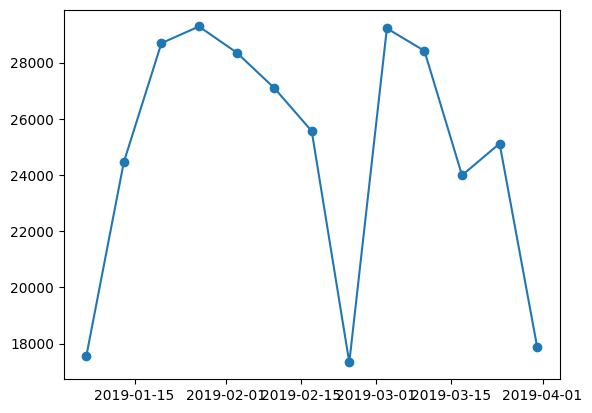

In [9]:
df_sorted = data.sort_values(by='Date')
df_sorted.set_index('Date', inplace=True)
df_semana = df_sorted.resample('W').agg({
    'Total': 'sum'
})
plt.plot(df_semana.index, df_semana['Total'], marker='o')

<Axes: xlabel='Gender'>

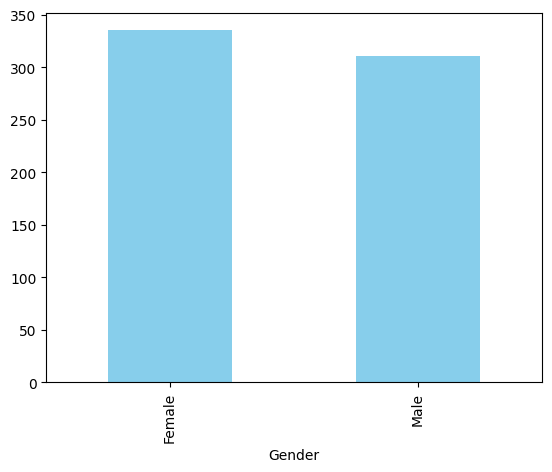

In [10]:
data.groupby('Gender')['Total'].mean().plot(kind='bar', color='skyblue')

<Axes: xlabel='Product line'>

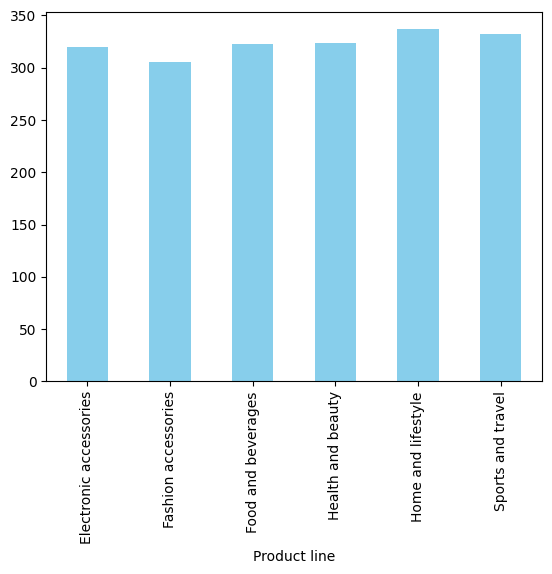

In [11]:
data.groupby('Product line')['Total'].mean().plot(kind='bar', color='skyblue')

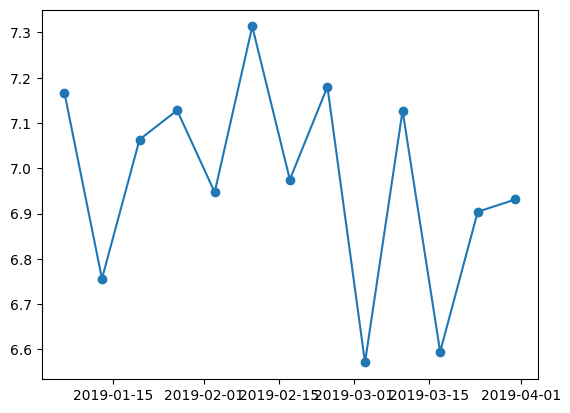

In [12]:
df_semana = df_sorted.resample('W').agg({
    'Rating': 'mean'
})
plt.plot(df_semana.index, df_semana['Rating'], marker='o')

## Clusters

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

In [14]:
# Separar variables numéricas y categóricas
numerical_features = ['Quantity', 'Rating']
categorical_features = ['City', 'Customer type', 'Gender','Product line', 'Payment']

# Hacer las categóricas dummies
encoded_features = pd.get_dummies(data[categorical_features],
               columns=categorical_features,
               drop_first=True)

# Estandarizar variables numéricas
data_to_model_standarized = StandardScaler().fit_transform(data[numerical_features])

# Hacer dataframe variables numéricas
data_to_model_df = pd.DataFrame(data_to_model_standarized,
                                columns=numerical_features).reset_index()

# Acomodar variables categóricas
encoded_features_df = encoded_features.reset_index()

# Juntar ambas variables
data_to_model = data_to_model_df.merge(encoded_features_df, on='index')
data_to_model = data_to_model.drop('index', axis=1)

data_to_model

,Quantity,Rating,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,0.509930,1.238443,False,True,False,False,False,False,True,False,False,False,True
1,-0.174540,1.529527,True,False,True,False,False,False,False,False,False,False,False
2,0.509930,0.248760,False,True,True,True,False,False,False,True,False,True,False
3,0.852165,0.830927,False,True,False,True,False,False,True,False,False,False,True
4,0.509930,-0.973790,False,True,True,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.543480,-0.449840,True,False,True,True,False,False,True,False,False,False,True
996,1.536635,-1.497741,False,False,True,False,False,False,False,True,False,False,True
997,-1.543480,0.423410,False,True,False,True,False,True,False,False,False,False,False
998,-1.543480,-1.672391,False,True,True,True,False,False,False,True,False,False,False


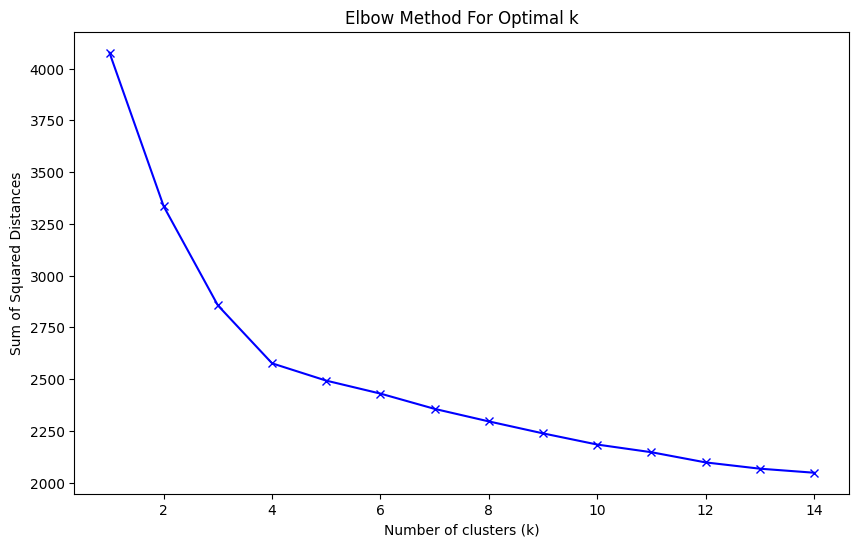

In [15]:
# Determinar el número óptimo de clusters usando el método del codo
sum_of_squared_distances = []
K = range(1, 15)  # Ajuste el rango según sea necesario
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(data_to_model)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
# Aplicar K-means clustering para identificar segmentos de clientes #AQUI SE CAMBIA # CLUSTERS CON EL ELBOW
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(data_to_model)

# Agregar las etiquetas del cluster al DataFrame original para análisis
data_to_model['Cluster'] = labels #DUMMIES
data['Cluster'] = labels #ORIGINAL
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,Pro/Det,Cluster
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1,Promotor,2
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,9.6,Promotor,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4,Pasivo,2
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4,Detractor,2
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3,Detractor,1


In [17]:
# VARIABLES NUMÉRICAS
def boxplot_clusters(columns):
    for col in columns:
        plt.figure(figsize=(5, 5))
        sns.boxplot(x='Cluster', y=col, data=data, hue='Cluster', palette='Set3')
        plt.title(f'Boxplot de {col} por Clusters')
        plt.show()

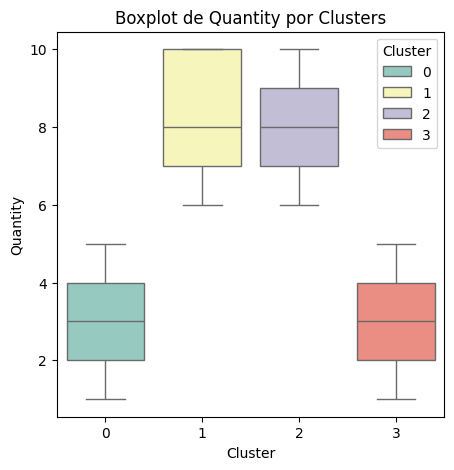

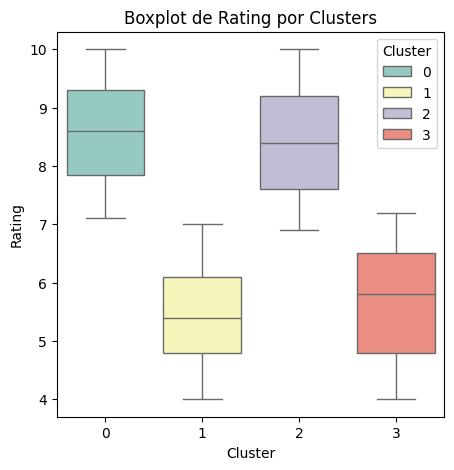

In [18]:
boxplot_clusters(numerical_features)

In [19]:
# CATEGORICAL FEATURES
def barplot_clusters(columns):
    for col in columns:
        sns.countplot(x='Cluster', hue=col, data=data, palette='Set1')
        plt.title('Count of Entries by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

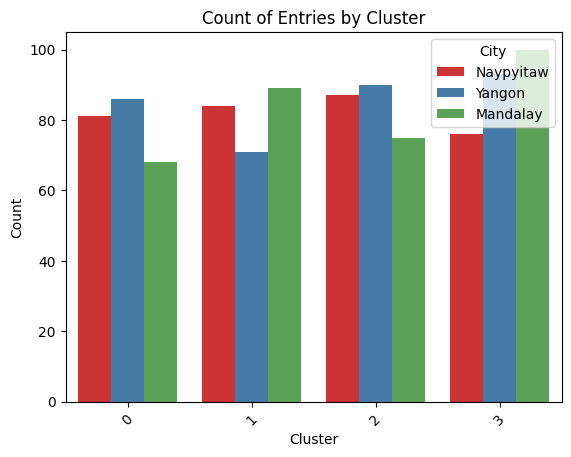

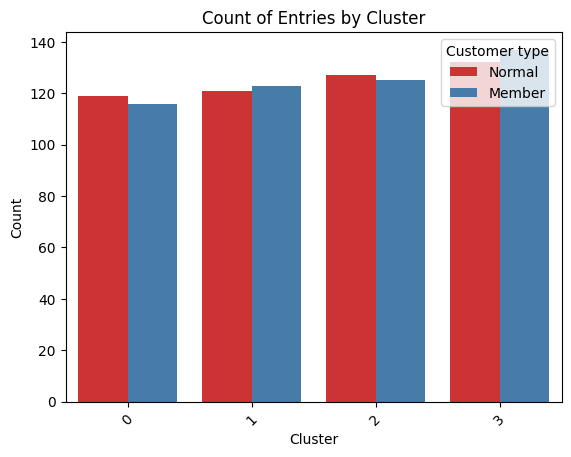

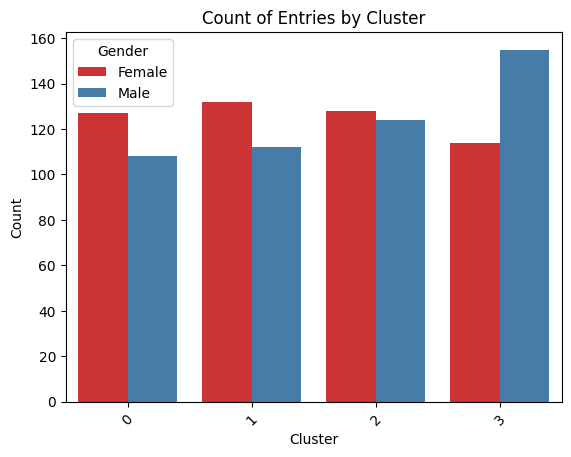

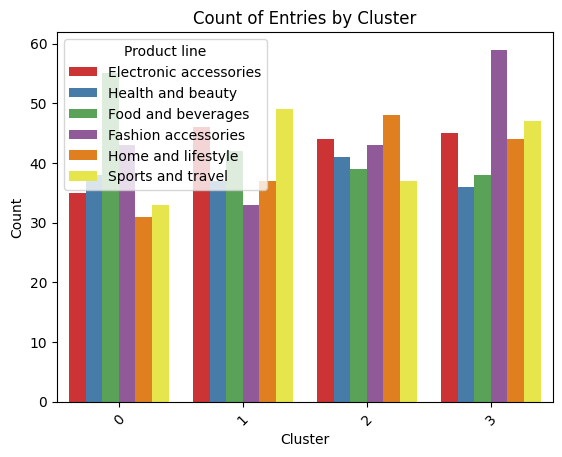

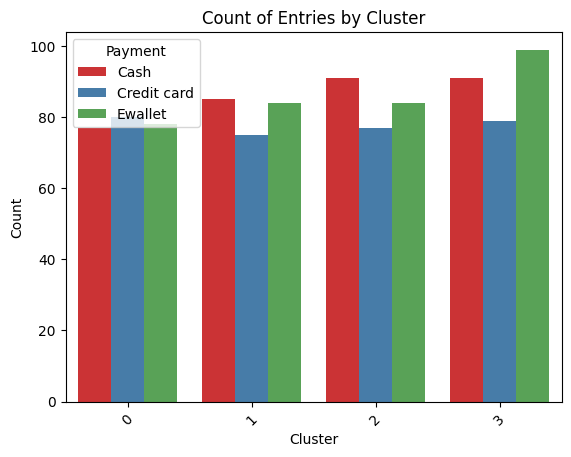

In [20]:
barplot_clusters(categorical_features)

## Regresión Lineal

In [21]:
#TODAS LAS X
numerical_features = ['Quantity', 'Rating']
categorical_features = ['City', 'Customer type', 'Gender','Product line', 'Payment', 'Cluster']

data_encoded = pd.get_dummies(data[['Invoice ID'] + categorical_features], columns=categorical_features)


df_data_with_encoded = data[['Invoice ID'] + numerical_features].merge(
    data_encoded, on = 'Invoice ID'
)

cosa = pd.DataFrame(df_data_with_encoded.groupby('Invoice ID')[df_data_with_encoded.columns[1:]].mean())
cosa.head()

,Quantity,Rating,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,...,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Cluster_0,Cluster_1,Cluster_2,Cluster_3
Invoice ID,,,,,,,,,,,,,,,,,,,,,
101-17-6199,7.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
101-81-4070,2.0,4.9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
102-06-2002,5.0,6.1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
102-77-2261,7.0,4.2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
105-10-6182,2.0,6.6,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
#LA Y
grouped = pd.DataFrame(data.groupby('Invoice ID')['Total'].sum())
todo = grouped.merge(cosa, on = 'Invoice ID')


In [23]:
X = todo[['Quantity', 'Cluster_0']]
y = todo['Total']

In [24]:
# Agregar la constante (intercepto) a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo usando OLS
model = sm.OLS(y, X)
results = model.fit()

# Mostrar el resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     494.1
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          7.82e-150
Time:                        02:10:46   Log-Likelihood:                -6578.9
No. Observations:                1000   AIC:                         1.316e+04
Df Residuals:                     997   BIC:                         1.318e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4899     14.701     -0.101      0.9

In [25]:
## Ecuación de regresión lineal

$
 56.9470*Quantity + 31.8877*Cluster\space0
$

Podemos ver que el coeficiente que tiene más valor y más impacto es la cantidad, por lo cual mientras más cantidad de productos se lleven por cada compra, mejor ingreso tendra la empresa. El otro coeficiente que impacta es el cluster 0, esto quiered decir que por cada unidad que se mueva por parte del cluster 0, el igreso aumentara 31.8877

## SEM

In [26]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,Pro/Det,Cluster
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1,Promotor,2
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,9.6,Promotor,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4,Pasivo,2
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4,Detractor,2
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3,Detractor,1


In [27]:
# Definir el modelo SEM
model_desc = """
# Latent Variables
Satisfaccion_cliente =~ Total + Rating + Customer_type
Calidad_servicio =~ Time + Tiempo_entrega + Tax

# Regressions
NPS ~ Satisfaccion_cliente + Calidad_servicio

# Variances and Covariances
Satisfaccion_cliente ~~ Calidad_servicio
"""

# Normalizar valores con MinMaxScaler
scaler = MinMaxScaler()

# 1. Variables relacionadas con Satisfaccion_cliente
Total = scaler.fit_transform(data['Total'].values.reshape(-1, 1))
Rating = scaler.fit_transform(data['Rating'].values.reshape(-1, 1))

# Convertir 'Customer_type' en dummies (Member=1, Normal=0)
data['Customer_type'] = data['Customer type'].apply(lambda x: 1 if x == 'Member' else 0)
Customer_type = scaler.fit_transform(data['Customer_type'].values.reshape(-1, 1))

# 2. Variables relacionadas con Calidad_servicio
# Simular la variable 'Time' (distribución normal simulada)
Time = scaler.fit_transform(np.random.normal(0, 1, len(data)).reshape(-1, 1))

# Simular la variable 'Time' (distribución normal simulada)
Tiempo_entrega = scaler.fit_transform(np.random.normal(0, 1, len(data)).reshape(-1, 1))

Tax = scaler.fit_transform(data['Tax 5%'].values.reshape(-1, 1))

# Crear la variable NPS influenciada por Satisfaccion_cliente y Calidad_servicio
NPS = scaler.fit_transform((Total + Rating + Customer_type + Time + Tiempo_entrega + Tax).flatten().reshape(-1, 1))

# Crear DataFrame final con todas las variables relevantes
data_sem = pd.DataFrame({
    "Total": Total.flatten(),
    "Rating": Rating.flatten(),
    "Customer_type": Customer_type.flatten(),
    "Time": Time.flatten(),
    "Tiempo_entrega": Tiempo_entrega.flatten(),
    "Tax": Tax.flatten(),
    "NPS": NPS.flatten()  # Convertir NPS a una lista unidimensional
})

# Revisar las correlaciones entre las variables
print(data_sem.corr())

# Ajustar el modelo SEM a los datos generados
mod = Model(model_desc)
res_opt = mod.fit(data_sem)
estimates = mod.inspect()

# Imprimir los resultados del ajuste del modelo
print(estimates)

                   Total    Rating  Customer_type      Time  Tiempo_entrega  \
Total           1.000000 -0.036442       0.019670  0.006969        0.026132   
Rating         -0.036442  1.000000      -0.018889  0.008207        0.003797   
Customer_type   0.019670 -0.018889       1.000000  0.055437        0.029556   
Time            0.006969  0.008207       0.055437  1.000000        0.008722   
Tiempo_entrega  0.026132  0.003797       0.029556  0.008722        1.000000   
Tax             1.000000 -0.036442       0.019670  0.006969        0.026132   
NPS             0.609495  0.331022       0.655011  0.229399        0.253839   

                     Tax       NPS  
Total           1.000000  0.609495  
Rating         -0.036442  0.331022  
Customer_type   0.019670  0.655011  
Time            0.006969  0.229399  
Tiempo_entrega  0.026132  0.253839  
Tax             1.000000  0.609495  
NPS             0.609495  1.000000  
                    lval  op                  rval   Estimate   Std. Er

In [28]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 3.578
Number of iterations: 321
Params: -0.040 0.055 0.575 25.283 0.471 1.599 0.002 0.056 0.000 0.250 0.027 0.082 0.004 0.029 0.021 0.001


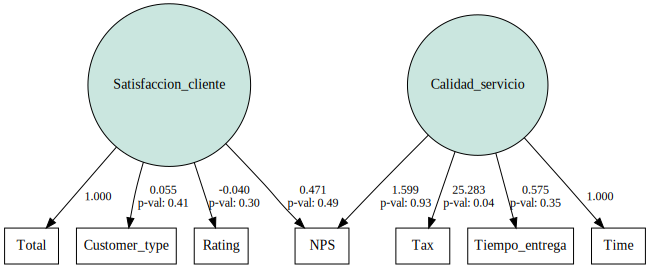

In [29]:
g = semplot(mod, "pd.png")
g